In [90]:
import grid
import pandas as pd
import numpy as np
import pickle
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from shapely.geometry import Point
import os
matplotlib.rcParams.update({'font.size': 28})

   0                                geometry
0  0  POINT (14.231134825 50.10219150972222)
1  1  POINT (14.231134825 50.10546275277778)
2  2   POINT (14.23783415 50.10219150972222)
3  3   POINT (14.23783415 50.10546275277778)
4  4   POINT (14.23783415 50.10873399583333)


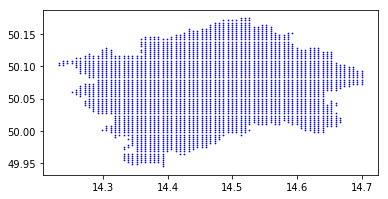

In [8]:
points = grid.get_grid(num_intervals = 72)
indices = list(range(len(points)))
gdf = gpd.GeoDataFrame(indices, crs = {'init':'epsg:4326'}, geometry = points)
print(gdf.head())
gdf.plot(marker='o', color='b', markersize=0.5)


In [3]:
len(points)

2836

In [4]:
walking_dict = {}

In [9]:
if(os.path.exists('./walking_dict.pkl')):
    wdp = open('./walking_dict.pkl', 'rb')
    walking_dict = pickle.load(wdp)
else:
    print('No dictionary found. Fetching walking times for all points.')
for p in points:
    if(str(p) in walking_dict):
        continue
    resp = grid.get_walking_time(p)
    if(resp is None):
        print('Error with point %s'%str(p))
        continue
    walking_dict[str(p)] = resp
wdp = open('./walking_dict.pkl', 'wb')
pickle.dump(walking_dict, wdp)

{'wp.0': '50.083593,14.4243832', 'wp.1': '49.990969245833334,14.31822605'}
{'wp.0': '50.083593,14.4243832', 'wp.1': '50.00732546111111,14.31822605'}
{'wp.0': '50.083593,14.4243832', 'wp.1': '50.04330913472222,14.31822605'}
{'wp.0': '50.083593,14.4243832', 'wp.1': '50.07602156527778,14.31822605'}
{'wp.0': '50.083593,14.4243832', 'wp.1': '50.079292808333335,14.31822605'}
{'wp.0': '50.083593,14.4243832', 'wp.1': '50.082564051388886,14.31822605'}
{'wp.0': '50.083593,14.4243832', 'wp.1': '50.08583529444444,14.31822605'}
{'wp.0': '50.083593,14.4243832', 'wp.1': '50.04658037777778,14.324925375000001'}
{'wp.0': '50.083593,14.4243832', 'wp.1': '50.04985162083333,14.324925375000001'}
{'wp.0': '50.083593,14.4243832', 'wp.1': '50.062936593055554,14.324925375000001'}
{'wp.0': '50.083593,14.4243832', 'wp.1': '50.07275032222222,14.324925375000001'}
{'wp.0': '50.083593,14.4243832', 'wp.1': '49.95498557222222,14.3316247'}
{'wp.0': '50.083593,14.4243832', 'wp.1': '49.971341787499995,14.3316247'}
{'wp.0'

In [10]:
walking_times = []
walking_dist = []
cleaned_points = []
#Removing points for which a distance could not be calculated
for p in points:
    if str(p) not in walking_dict:
        print('skipping')
        continue
    cleaned_points.append(p)
    tup = walking_dict[str(p)]
    walking_times.append(tup[0])
    walking_dist.append(tup[1])

skipping
skipping


In [11]:
gdf = gpd.GeoDataFrame(crs = {'init':'epsg:4326'}, geometry = cleaned_points)

In [12]:
gdf['walk_dist'] = walking_dist
gdf['walk_time'] = walking_times

In [13]:
gdf.head()

,geometry,walk_dist,walk_time
0,POINT (14.231134825 50.10219150972222),3.313,39.766667
1,POINT (14.231134825 50.10546275277778),3.179,38.150000
2,POINT (14.23783415 50.10219150972222),3.856,46.283333
3,POINT (14.23783415 50.10546275277778),2.898,34.800000
4,POINT (14.23783415 50.10873399583333),2.652,31.833333


In [139]:
fp = './shapefiles/outline.shp'
fp_railways = './shapefiles/railways.shp'
fp_roads = "./shapefiles/roads.shp"
fp_all_routes = "./shapefiles/all_routes.geojson"

bg = gpd.read_file(fp)
roads = gpd.read_file(fp_roads)
railways = gpd.read_file(fp_railways)

all_routes = gpd.read_file(fp_all_routes) 



In [41]:
highways = roads[roads['maxspeed']>60]
tramways = railways[railways['type']=='tram']
metro_C = railways[(railways['type']=='subway') & (railways['name']=='Metro C')]
metro_B = railways[(railways['type']=='subway') & (railways['name']=='Metro B')]
metro_A = railways[(railways['type']=='subway') & (railways['name']=='Metro A')]
buses  = all_routes[all_routes['route_type']==3]




In [47]:
#Defining the legend for the walk time points
walk_times = pd.DataFrame()
walk_times['walk_time'] = [10, 20, 30, 40]
walk_times

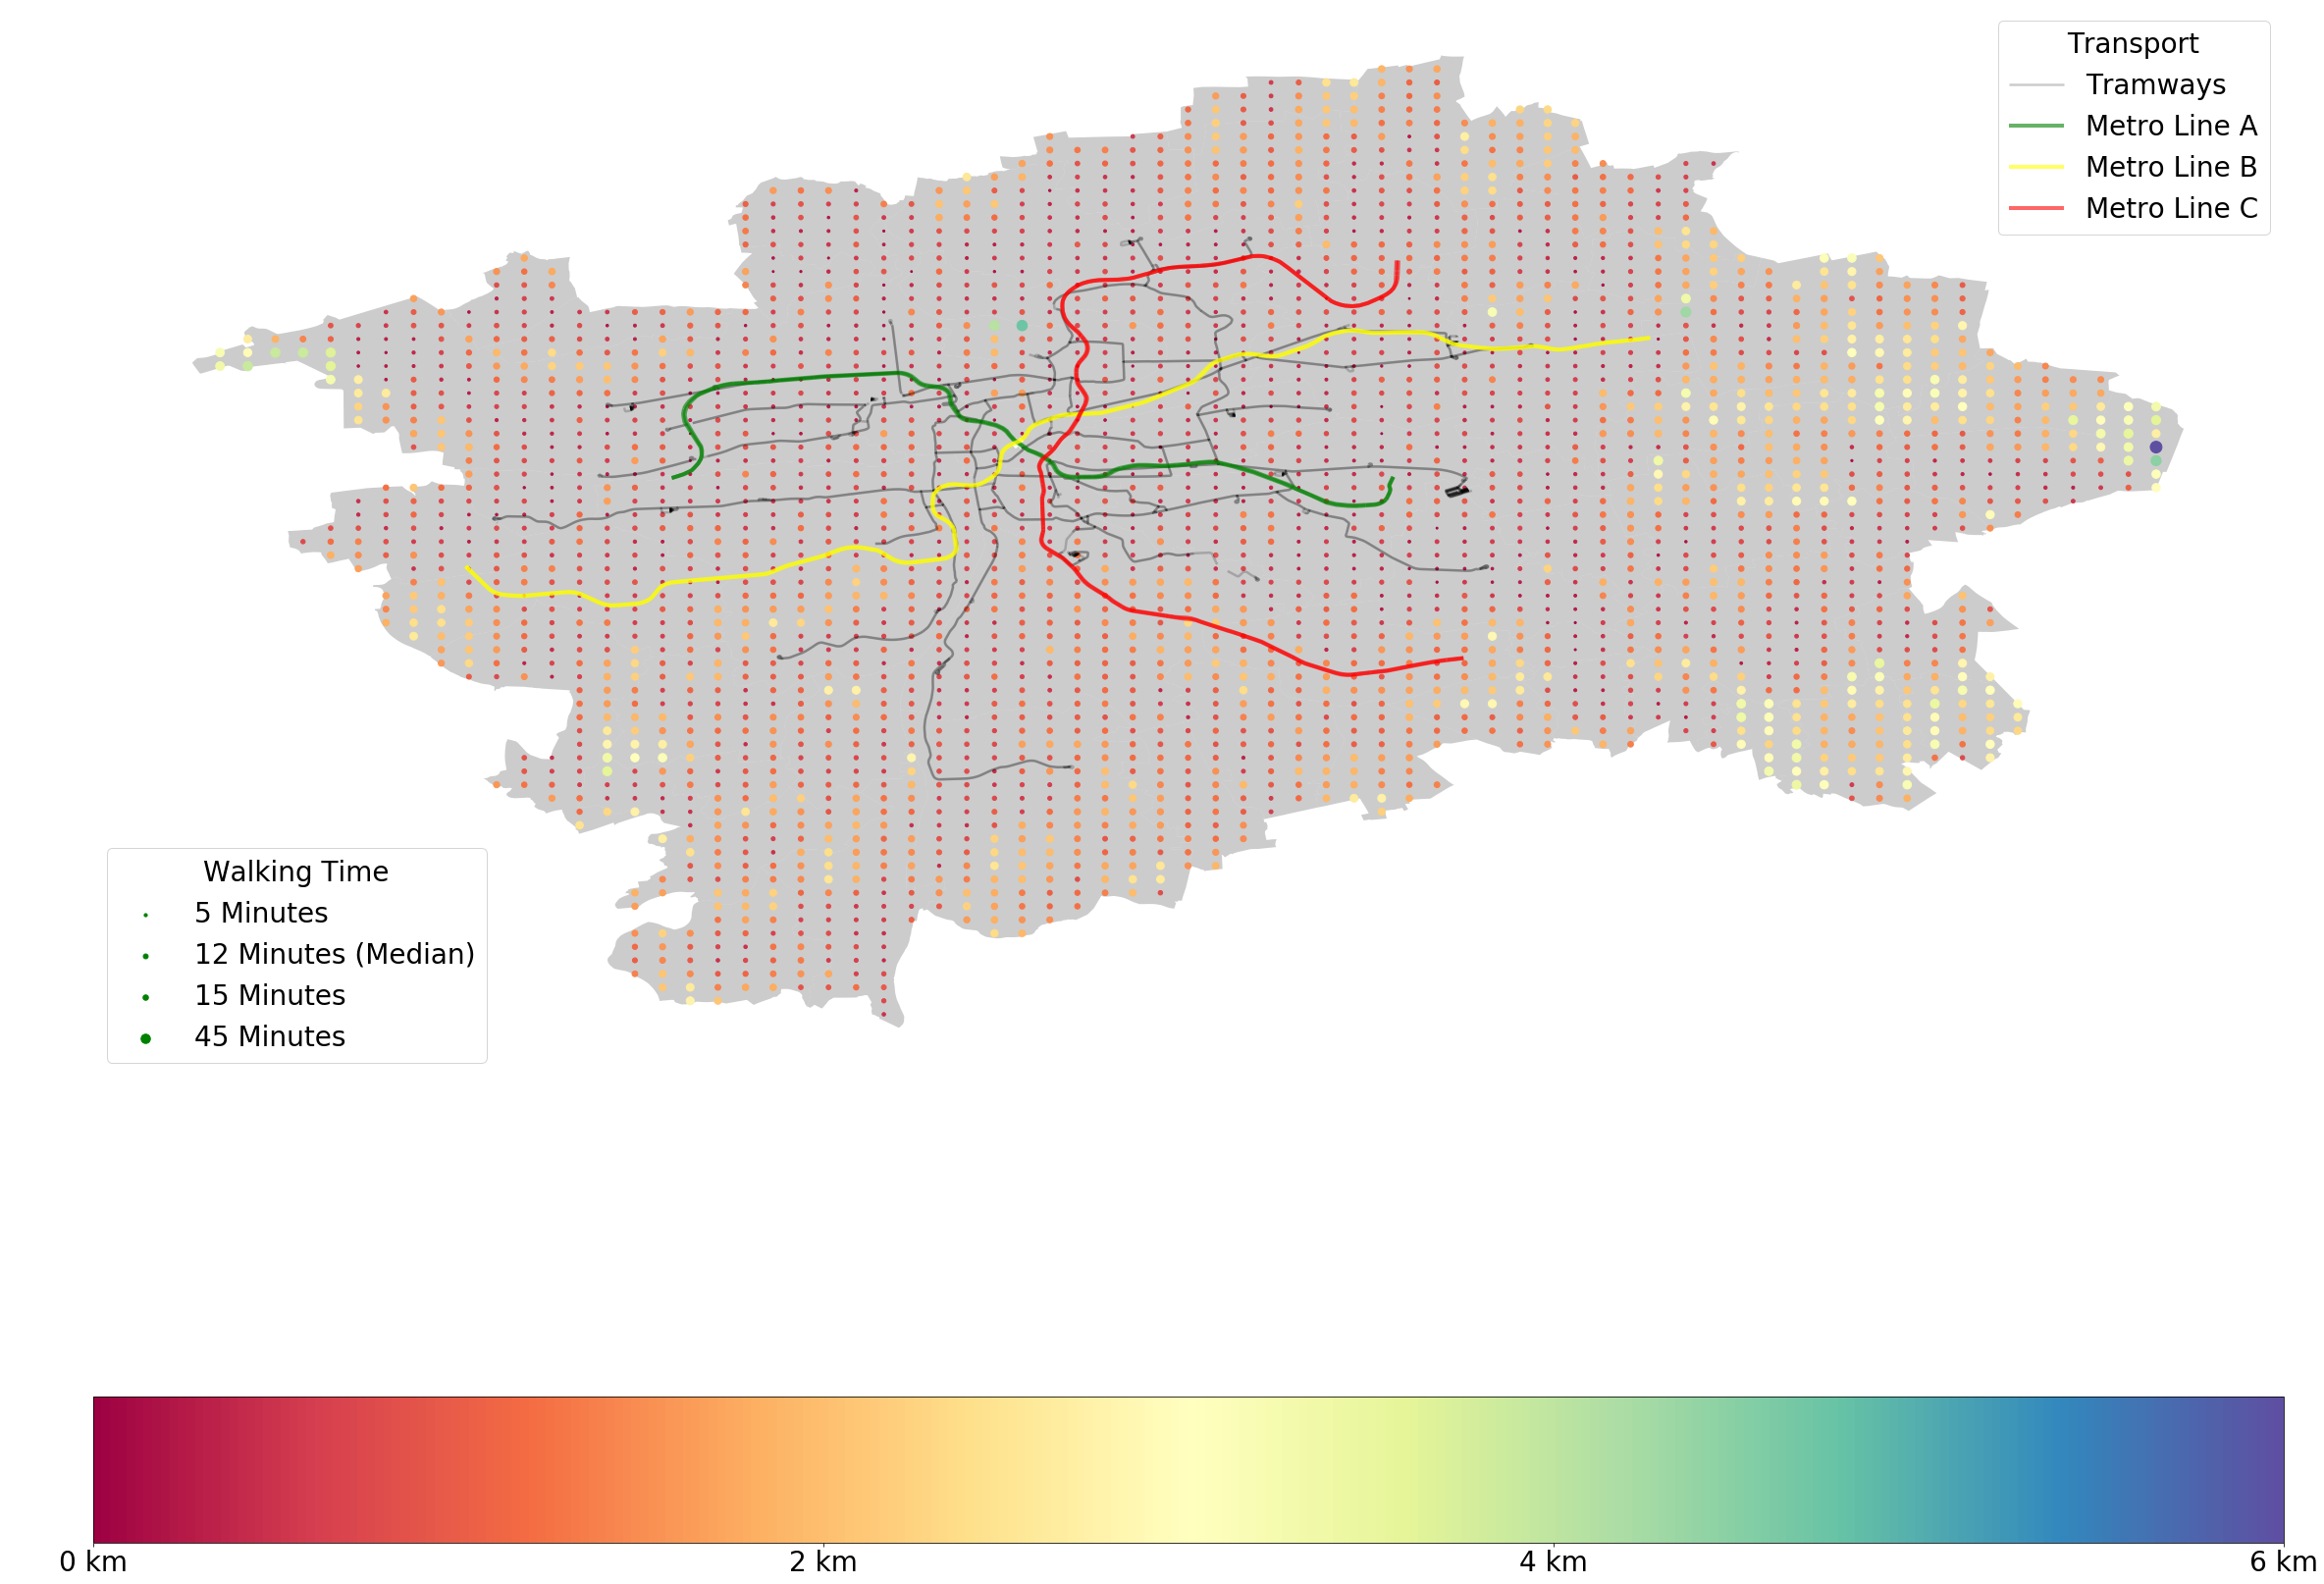

In [119]:
#Defining the figure and axis on which everything else is plotted
fig, ax = plt.subplots(1, figsize=(40, 40))
plt.axis('off')
CMAP = 'Spectral'
SM = 2
#Plotting the background shape
bg.plot(column=None,ax=ax, linewidth = 2.8, alpha=0.4, color='grey')

tram_linewidth = 2.5
tramways.plot(column=None,ax=ax, alpha=0.2, color='black', linewidth=tram_linewidth, label='Tramways')
#buses.plot(column=None, ax=ax, alpha=0.1, color='purple')

metro_linewidth = 4
metro_A.plot(column=None, ax=ax, alpha=0.6, color='green', linewidth=metro_linewidth, label='Metro Line A')
metro_B.plot(column=None, ax=ax, alpha=0.6, color='yellow', linewidth=metro_linewidth, label='Metro Line B')
metro_C.plot(column=None, ax=ax, alpha=0.6, color='red', linewidth=metro_linewidth, label='Metro Line C')

points = gdf.plot(ax=ax,column='walk_dist',cmap=CMAP, markersize=gdf['walk_time']*2)

#Plotting reference point in GREEN. Replace later
mustek = gpd.GeoDataFrame(crs = {'init':'epsg:4326'}, geometry = [Point(14.4243838,50.083593)])
mustek.plot(ax=ax, color='white', markersize=100, marker='X')

#Plotting legend/colorbar for the point colour(walk dist)
sm = plt.cm.ScalarMappable(cmap=CMAP, norm=plt.Normalize(vmin=0, vmax=6))
sm._A = []
cbar = plt.colorbar(sm, orientation='horizontal', aspect=15, ticks=[0,2, 4, 6])
cbar.ax.set_xticklabels(['0 km','2 km', '4 km', '6 km'])


#Plotting the legend for the point size(walk time)
l1 = plt.legend(loc='upper right', title="Transport")
ax.add_artist(l1)

handles = [ plt.scatter([], [], s=time*2,c='green',label=str(time)+' Minutes') for time in [5, 15, 45]]
handles.insert(1,plt.scatter([], [], s=gdf['walk_time'].median()*2,c='green',label=str(int(gdf['walk_time'].median()))+' Minutes (Median)'))
l2 = plt.legend(handles=handles, loc='lower left', title='Walking Time')


#Saving the plot to file
plt.savefig('figure.png',dpi=400)

In [45]:
gdf.head()

,geometry,walk_dist,walk_time
0,POINT (14.231134825 50.10219150972222),3.313,39.766667
1,POINT (14.231134825 50.10546275277778),3.179,38.150000
2,POINT (14.23783415 50.10219150972222),3.856,46.283333
3,POINT (14.23783415 50.10546275277778),2.898,34.800000
4,POINT (14.23783415 50.10873399583333),2.652,31.833333


In [113]:
print(gdf['walk_dist'].median())
print(gdf['walk_time'].median())
print(gdf['walk_dist'].mean())
print(gdf['walk_time'].mean())


1.0015
12.016666666666667
1.1627639378969654
13.960009409550695
